<a href="https://colab.research.google.com/github/ypushpa9420/Sem-2-Project/blob/main/MiniProject_Sem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import drive
drive.mount('/content/drive')

/
Mounted at /content/gdrive
Mounted at /content/drive


In [2]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)


Saving utils.py to utils.py


12308

In [3]:
# hides all warnings
import warnings
warnings.filterwarnings('ignore')

# imports
# pandas 
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
# sns
import seaborn as sns
# util

import utils


In [4]:
##############################################################
# Read Data 
##############################################################

# read dataset
df = pd.read_csv('/content/drive/MyDrive/Sem 2/Project/bank-additional-full.csv', delimiter=';')


In [5]:
##############################################################
# Exploratory Data Analytics
##############################################################

# columns
print("\n*** Columns ***")
print(df.columns)

# info
print("\n*** Structure ***")
print(df.info())

# summary
print("\n*** Summary ***")
print(df.describe())

# head
print("\n*** Head ***")
print(df.head())



*** Columns ***
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration       

In [6]:
##############################################################
# Class Variable & Counts
##############################################################

# store class variable  
# change as required
clsVars = "y"
print("\n*** Class Variable ***")
print(clsVars)

# counts
print("\n*** Counts ***")
print(df.groupby(df[clsVars]).size())

# get unique Class names
print("\n*** Unique Class - Categoric Numeric ***")
lnLabels = df[clsVars].unique()
print(lnLabels)


# convert string / categoric to numeric
print("\n*** Unique Species - Categoric Alpha to Numeric ***")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[clsVars] = le.fit_transform(df[clsVars])
lnCCodes = df[clsVars].unique()
print(lnCCodes)



*** Class Variable ***
y

*** Counts ***
y
no     36548
yes     4640
dtype: int64

*** Unique Class - Categoric Numeric ***
['no' 'yes']

*** Unique Species - Categoric Alpha to Numeric ***
[0 1]


In [7]:
##############################################################
# Data Transformation
##############################################################


# convert alpha categoric to numeric categoric
# change as required
print("\n*** Transformations ***")
lejob = preprocessing.LabelEncoder()
print(df['job'].unique())
df['job'] = lejob.fit_transform(df['job'])
print(df['job'].unique())

lemarital = preprocessing.LabelEncoder()
print(df['marital'].unique())
df['marital'] = lemarital.fit_transform(df['marital'])
print(df['marital'].unique())

leeducation = preprocessing.LabelEncoder()
print(df['education'].unique())
df['education'] = leeducation.fit_transform(df['education'])
print(df['education'].unique())


ledefault = preprocessing.LabelEncoder()
print(df['default'].unique())
df['default'] = ledefault.fit_transform(df['default'])
print(df['default'].unique())

lehousing = preprocessing.LabelEncoder()
print(df['housing'].unique())
df['housing'] = lehousing.fit_transform(df['housing'])
print(df['housing'].unique())

leloan = preprocessing.LabelEncoder()
print(df['loan'].unique())
df['loan'] = leloan.fit_transform(df['loan'])
print(df['loan'].unique())

lecontact = preprocessing.LabelEncoder()
print(df['contact'].unique())
df['contact'] = lecontact.fit_transform(df['contact'])
print(df['contact'].unique())

lemonth = preprocessing.LabelEncoder()
print(df['month'].unique())
df['month'] = lemonth.fit_transform(df['month'])
print(df['month'].unique())

leday_of_week = preprocessing.LabelEncoder()
print(df['day_of_week'].unique())
df['day_of_week'] = leday_of_week.fit_transform(df['day_of_week'])
print(df['day_of_week'].unique())

lepoutcome = preprocessing.LabelEncoder()
print(df['poutcome'].unique())
df['poutcome'] = lepoutcome.fit_transform(df['poutcome'])
print(df['poutcome'].unique())



*** Transformations ***
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
[ 3  7  0  1  9  5  4 10  6 11  2  8]
['married' 'single' 'divorced' 'unknown']
[1 2 0 3]
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
[0 3 1 2 5 7 6 4]
['no' 'unknown' 'yes']
[0 1 2]
['no' 'yes' 'unknown']
[0 2 1]
['no' 'yes' 'unknown']
[0 2 1]
['telephone' 'cellular']
[1 0]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
[6 4 3 1 8 7 2 5 0 9]
['mon' 'tue' 'wed' 'thu' 'fri']
[1 3 4 2 0]
['nonexistent' 'failure' 'success']
[1 0 2]


In [8]:
# check outlier count
print('\n*** Outlier Count ***')
print(utils.OutlierCount(df))

# check outlier values
print('\n*** Outlier Values ***')
print(utils.OutlierValues(df))


colNames=["campaign","pdays","previous"]
for colName in colNames:
      colType =  df[colName].dtype  
      df[colName] = utils.HandleOutliers(df[colName])
      if df[colName].isnull().sum() > 0:
          df[colName] = df[colName].astype(np.float64)
      else:
          df[colName] = df[colName].astype(colType)  
          
# check outlier count
print('\n*** Outlier Count ***')
print(utils.OutlierCount(df))



*** Outlier Count ***
age                  4
job                  0
marital              0
education            0
default           8600
housing              0
loan              7238
contact              0
month                0
day_of_week          0
duration          1043
campaign          1094
pdays             1515
previous          5625
poutcome          5625
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                 4640
dtype: int64

*** Outlier Values ***
age                                     [95 98 98 94]
job                                                []
marital                                            []
education                                          []
default                             [1 1 1 ... 1 1 1]
housing                                            []
loan                                [2 2 2 ... 2 2 2]
contact                                            []
month                    

In [9]:
# check zeros
print('\n*** Columns With Zeros ***')
print((df==0).sum())

# check variance
print('\n*** Variance In Columns ***')
print(df.var())

# check std dev 
print('\n*** StdDev In Columns ***')
print(df.std())

# check mean
print('\n*** Mean In Columns ***')
print(df.mean())



*** Columns With Zeros ***
age                   0
job               10422
marital            4612
education          4176
default           32588
housing           18622
loan              33950
contact           26144
month              2632
day_of_week        7827
duration              4
campaign              0
pdays                 0
previous          41188
poutcome           4252
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                 36548
dtype: int64

*** Variance In Columns ***
age                 108.602451
job                  12.920864
marital               0.370762
education             4.564557
default               0.165394
housing               0.970844
loan                  0.523620
contact               0.231849
month                 5.382516
day_of_week           1.953216
duration          67225.728877
campaign              3.746506
pdays                 0.000000
previous              0

In [10]:
# normalize data
print('\n*** Normalize Data ***')
df = utils.NormalizeData(df, clsVars)
print('Done ...')

# check variance
print('\n*** Variance In Columns ***')
print(df.var())

# check std dev 
print('\n*** StdDev In Columns ***')
print(df.std())



*** Normalize Data ***
Done ...

*** Variance In Columns ***
age               0.016553
job               0.106784
marital           0.041196
education         0.093154
default           0.041348
housing           0.242711
loan              0.130905
contact           0.231849
month             0.066451
day_of_week       0.122076
duration          0.002779
campaign          0.058539
pdays             0.000000
previous          0.000000
poutcome          0.032922
emp.var.rate      0.107114
cons.price.idx    0.050887
cons.conf.idx     0.037500
euribor3m         0.154614
nr.employed       0.074618
y                 0.099966
dtype: float64

*** StdDev In Columns ***
age               0.128657
job               0.326778
marital           0.202967
education         0.305212
default           0.203343
housing           0.492657
loan              0.361808
contact           0.481507
month             0.257781
day_of_week       0.349394
duration          0.052720
campaign          0.241949
pdays

In [11]:
# check nulls
print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 



*** Columns With Nulls ***
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [12]:
# feature selection
print("\n*** Feature Scores - XTC ***")
print(utils.getFeatureScoresXTC(df, clsVars))

print("\n*** Feature Scores - SKC ***")
print(utils.getFeatureScoresSKB(df, clsVars))



*** Feature Scores - XTC ***
              Cols       Imp
10        duration  0.265898
18       euribor3m  0.101815
0              age  0.093311
19     nr.employed  0.069222
11        campaign  0.058948
1              job  0.058328
3        education  0.054578
9      day_of_week  0.052120
14        poutcome  0.044564
15    emp.var.rate  0.034045
2          marital  0.032888
5          housing  0.027997
17   cons.conf.idx  0.021827
16  cons.price.idx  0.020382
6             loan  0.019923
8            month  0.016284
7          contact  0.015408
4          default  0.012460
12           pdays  0.000000
13        previous  0.000000

*** Feature Scores - SKC ***
              Cols          Imp
10        duration  8094.101634
19     nr.employed  5926.610646
18       euribor3m  4309.479048
15    emp.var.rate  4023.829925
7          contact   881.707070
16  cons.price.idx   778.589786
14        poutcome   705.678164
4          default   410.590785
11        campaign   208.208022
3        ed

In [13]:
#drop cols
#change as required
print("\n*** Drop Cols ***")
df = df.drop('duration', axis=1)
df = df.drop('pdays', axis=1)
df = df.drop('previous', axis=1)
print("Done ...")



*** Drop Cols ***
Done ...



*** Boxplot ***


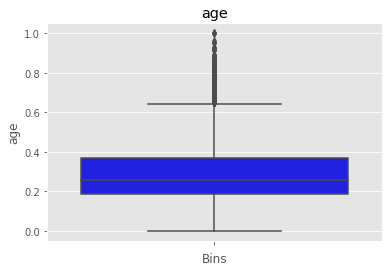

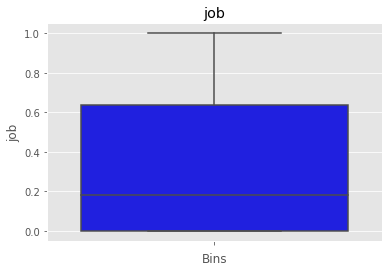

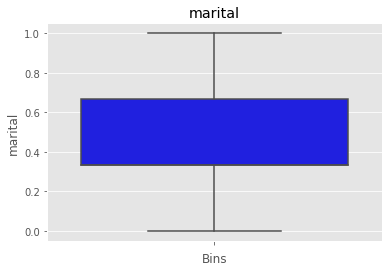

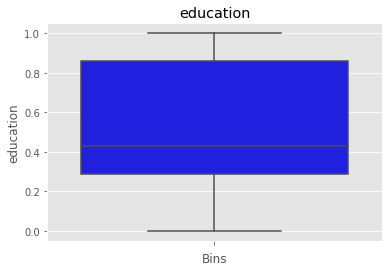

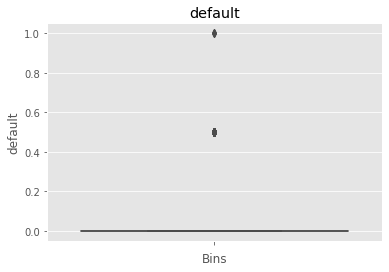

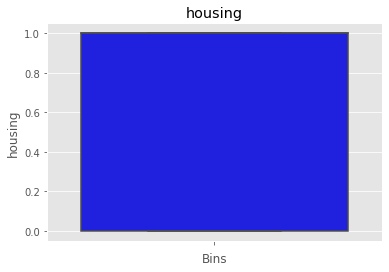

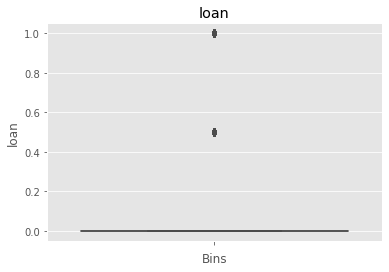

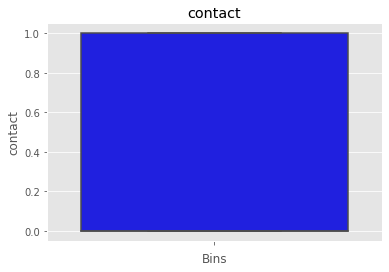

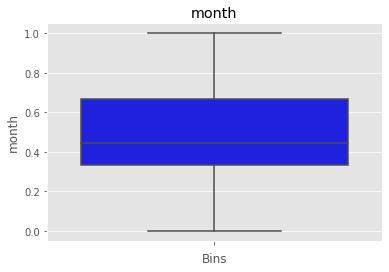

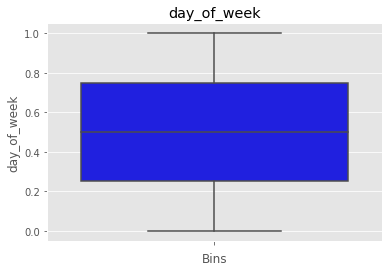

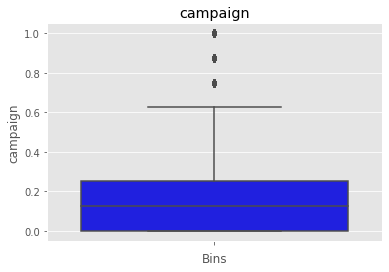

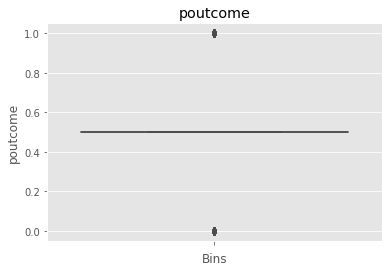

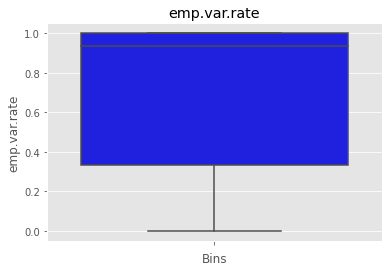

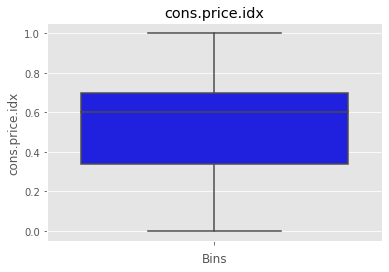

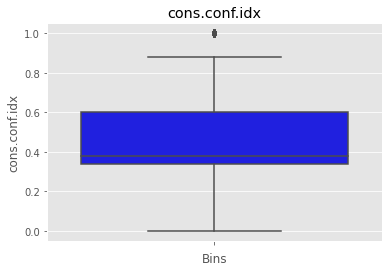

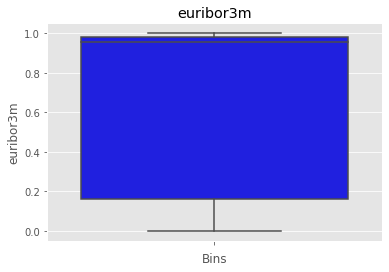

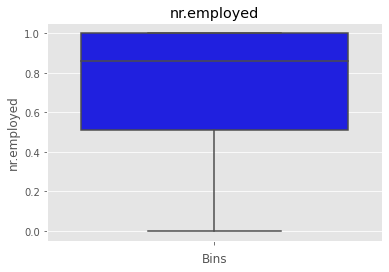

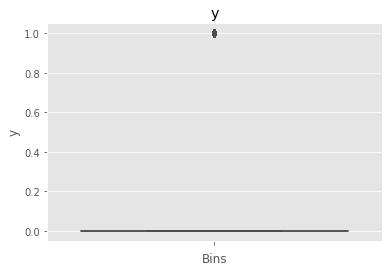

In [14]:
##############################################################
# Visual Data Anlytics
##############################################################

# boxplot
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()



*** Histogram Plot ***
Histograms


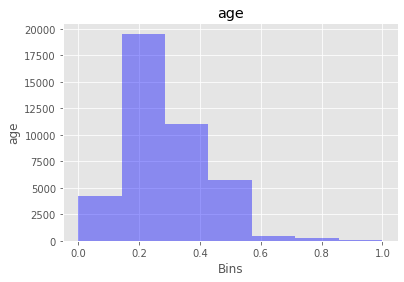

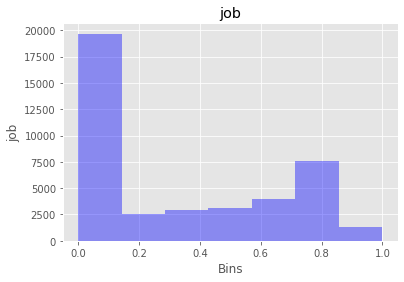

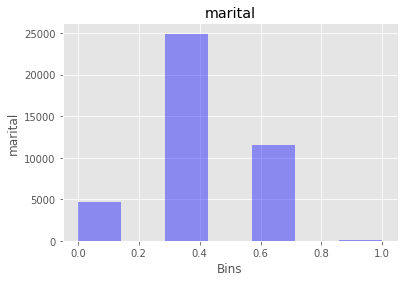

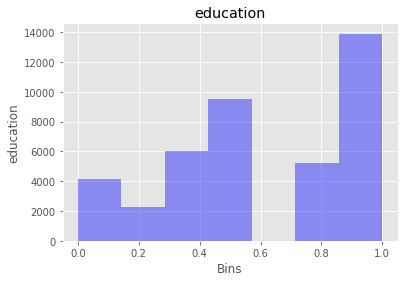

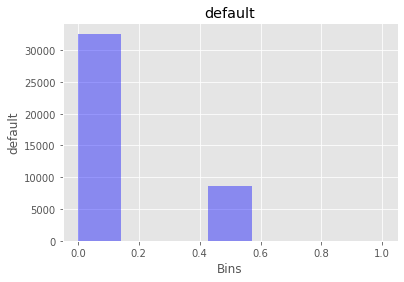

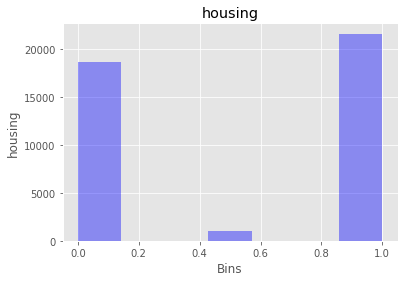

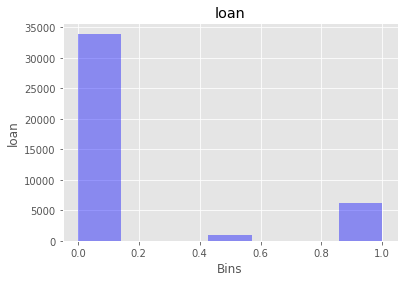

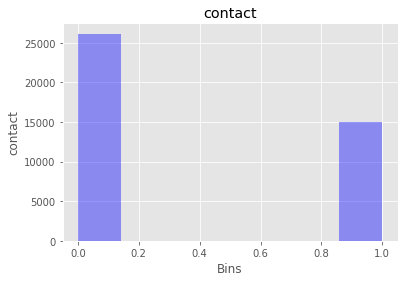

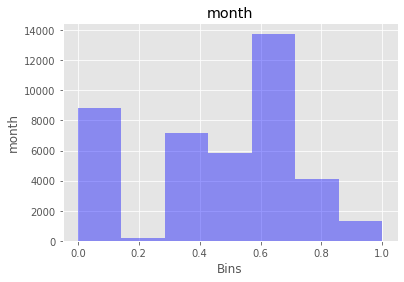

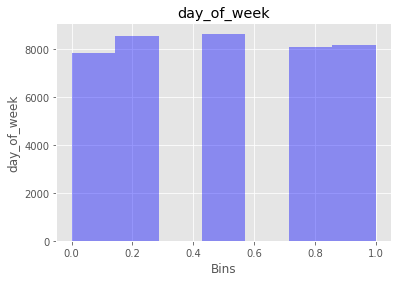

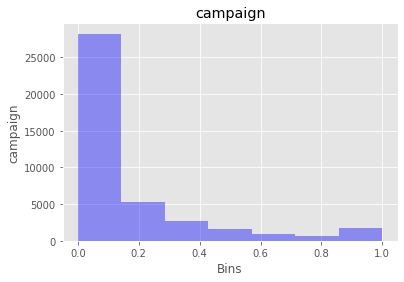

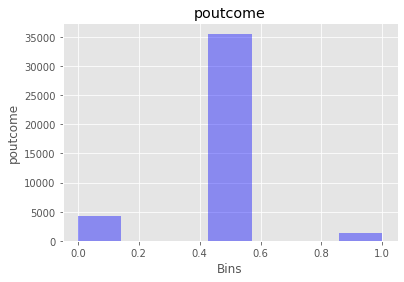

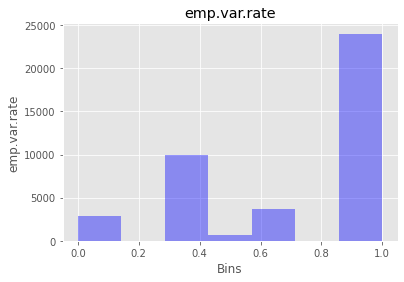

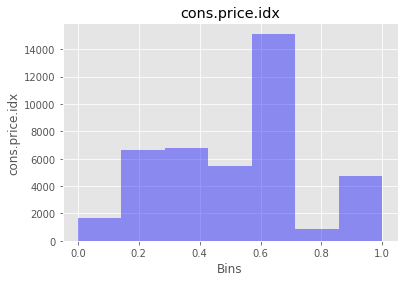

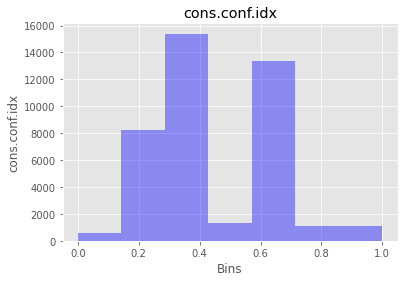

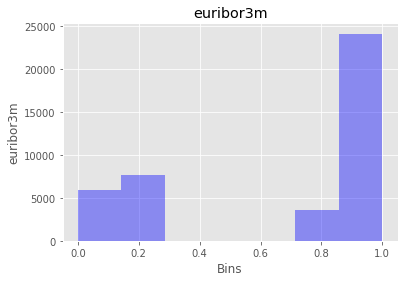

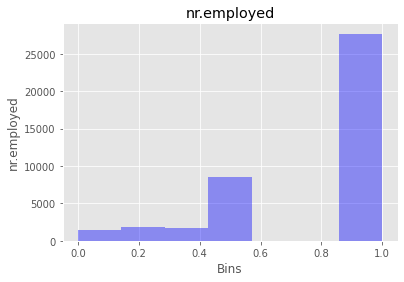

In [15]:
# histograms
# plot histograms
print("\n*** Histogram Plot ***")
colNames = df.columns.tolist()
colNames.remove(clsVars)
print('Histograms')
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()



*** Distribution Plot ***


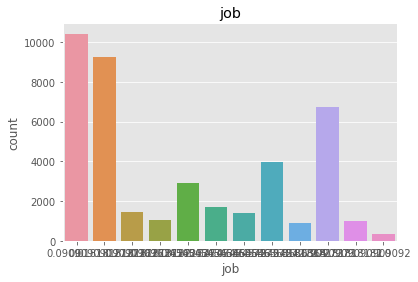

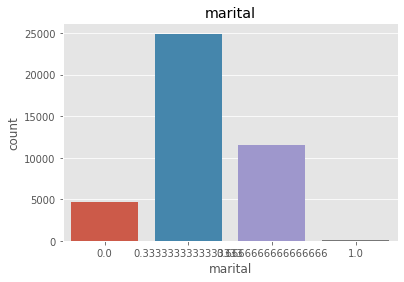

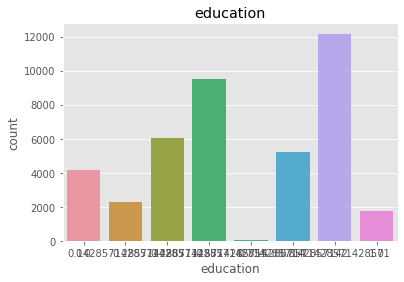

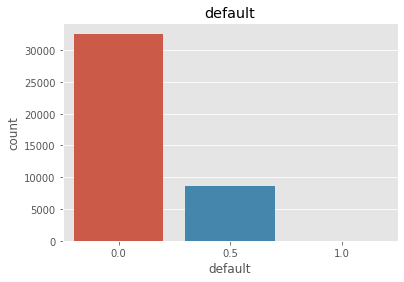

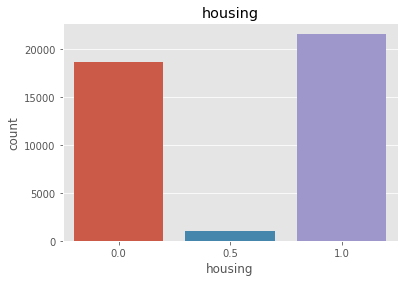

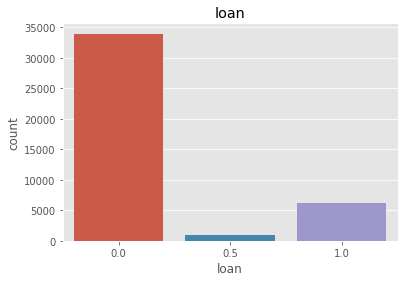

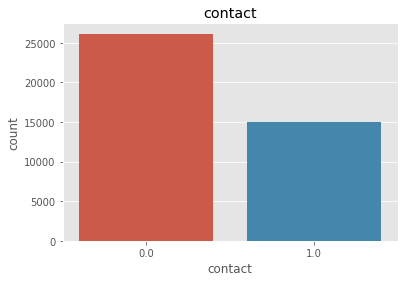

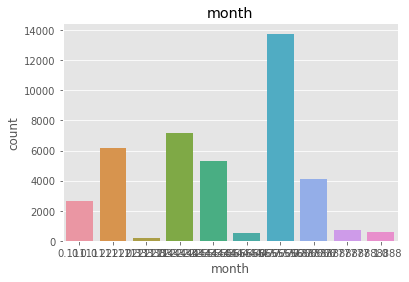

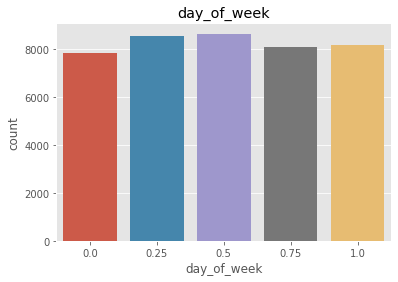

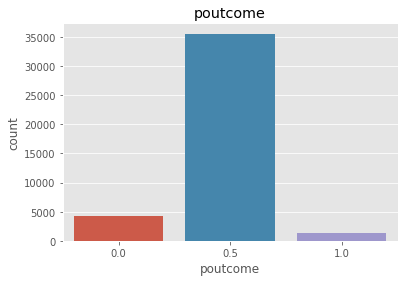

In [16]:
# all categoic variables except clsVars
# change as required
colNames = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
print("\n*** Distribution Plot ***")
for colName in colNames:
    plt.figure()
    sns.countplot(df[colName],label="Count")
    plt.title(colName)
    plt.show()



*** Group Counts ***
y
0    36548
1     4640
dtype: int64


*** Distribution Plot ***


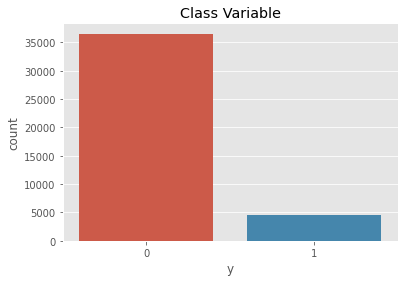

In [17]:
# check class
# outcome groupby count    
print("\n*** Group Counts ***")
print(df.groupby(clsVars).size())
print("")

# class count plot
print("\n*** Distribution Plot ***")
plt.figure()
sns.countplot(df[clsVars],label="Count")
plt.title('Class Variable')
plt.show()


In [18]:
# split into data & target
print("\n*** Prepare Data ***")
allCols = df.columns.tolist()
print(allCols)
allCols.remove(clsVars)
print(allCols)
X = df[allCols].values
y = df[clsVars].values

# shape
print("\n*** Prepare Data - Shape ***")
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# head
print("\n*** Prepare Data - Head ***")
print(X[0:4])
print(y[0:4])

# counts
print("\n*** Counts ***")
print(df.groupby(df[clsVars]).size())

# over sampling
print("\n*** Over Sampling Process ***")
X, y = utils.getOverSamplerData(X, y)
print("Done ...")

# counts
print("\n*** Counts ***")
unique_elements, counts_elements = np.unique(y, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

# shape
print("\n*** Prepare Data - Shape ***")
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))



*** Prepare Data ***
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

*** Prepare Data - Shape ***
(41188, 17)
(41188,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

*** Prepare Data - Head ***
[[0.481 0.273 0.333 0.    0.    0.    0.    1.    0.667 0.25  0.    0.5
  0.938 0.699 0.603 0.957 0.86 ]
 [0.494 0.636 0.333 0.429 0.5   0.    0.    1.    0.667 0.25  0.    0.5
  0.938 0.699 0.603 0.957 0.86 ]
 [0.247 0.636 0.333 0.429 0.    1.    0.    1.    0.667 0.25  0.    0.5
  0.938 0.699 0.603 0.957 0.86 ]
 [0.284 0.    0.333 0.143 0.    0.    0.    1.    0.667 0.25  0.    0.5
  0.938 0.699 0.603 0.957 0.86 ]]
[0 0 0 0]


In [19]:
################################
# Classification 
# Split Train & Test
###############################

print(df.info())

# imports
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                test_size=0.33, random_state=707)

# shapes
print("\n*** Train & Test Data ***")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# counts
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("\n*** Frequency of unique values of Train Data ***")
print(np.asarray((unique_elements, counts_elements)))

# counts
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("\n*** Frequency of unique values of Test Data ***")
print(np.asarray((unique_elements, counts_elements)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  campaign        41188 non-null  float64
 11  poutcome        41188 non-null  float64
 12  emp.var.rate    41188 non-null  float64
 13  cons.price.idx  41188 non-null  float64
 14  cons.conf.idx   41188 non-null  float64
 15  euribor3m       41188 non-null  float64
 16  nr.employed     41188 non-null  float64
 17  y               41188 non-null 

In [20]:
################################
# Classification 
# actual model ... create ... fit ... predict
###############################

# original
# import all model & metrics
print("\n*** Importing Models ***")
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB
print("\nDone ...")

# create a list of models so that we can use the models in an iterstive manner
print("\n*** Creating Models ***")
models = []
models.append(('SVM-Clf', SVC(random_state=707)))
models.append(('RndFrst', RandomForestClassifier(random_state=707)))
models.append(('KNN-Clf', KNeighborsClassifier()))
models.append(('LogRegr', LogisticRegression(random_state=707)))
models.append(('DecTree', DecisionTreeClassifier(random_state=707)))
models.append(('GNBayes', GaussianNB()))
print(models)
print("\nDone ...")



*** Importing Models ***

Done ...

*** Creating Models ***
[('SVM-Clf', SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=707, shrinking=True, tol=0.001,
    verbose=False)), ('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False)), ('KNN-Clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_pa

In [21]:
################################
# Classification 
# Cross Validation
###############################

# blank list to store results
print("\n*** Cross Validation Init ***")
xvModNames = []
xvAccuracy = []
xvSDScores = []
print("Done ...")

# cross validation
from sklearn import model_selection
print("\n*** Cross Validation ***")
# iterate through the models
for name, model in models:
    # select xv folds
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=707)
    # actual corss validation
    cvAccuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # prints result of cross val ... scores count = lfold splits
    print(name,":  ",cvAccuracy)
    # update lists for future use
    xvModNames.append(name)
    xvAccuracy.append(cvAccuracy.mean())
    xvSDScores.append(cvAccuracy.std())



*** Cross Validation Init ***
Done ...

*** Cross Validation ***
SVM-Clf :   [0.749 0.752 0.742 0.748 0.75  0.756 0.742 0.745 0.749 0.757]
RndFrst :   [0.956 0.955 0.957 0.956 0.959 0.962 0.958 0.956 0.957 0.955]
KNN-Clf :   [0.842 0.846 0.837 0.841 0.844 0.843 0.842 0.834 0.847 0.843]
LogRegr :   [0.734 0.735 0.726 0.728 0.731 0.742 0.722 0.73  0.736 0.739]
DecTree :   [0.934 0.928 0.933 0.925 0.934 0.937 0.929 0.928 0.927 0.93 ]
GNBayes :   [0.716 0.724 0.71  0.715 0.716 0.716 0.703 0.713 0.721 0.72 ]


In [22]:
# cross val summary
print("\n*** Cross Validation Summary ***")
# header
msg = "%7s: %10s %8s" % ("Model", "xvAccuracy", "xvStdDev")
print(msg)
# for each model
for i in range(0,len(xvModNames)):
    # print accuracy mean & std
    msg = "%8s: %5.7f %5.7f" % (xvModNames[i], xvAccuracy[i], xvSDScores[i])
    print(msg)



*** Cross Validation Summary ***
  Model: xvAccuracy xvStdDev
 SVM-Clf: 0.7489281 0.0048758
 RndFrst: 0.9571202 0.0020134
 KNN-Clf: 0.8419978 0.0036552
 LogRegr: 0.7323683 0.0056896
 DecTree: 0.9304734 0.0038336
 GNBayes: 0.7153183 0.0057608


In [23]:
# find model with best xv accuracy & print details
print("\n*** Best XV Accuracy Model ***")
maxXVIndx = xvAccuracy.index(max(xvAccuracy))
print("Index     ",maxXVIndx)
print("Model Name",xvModNames[maxXVIndx])
print("XVAccuracy",xvAccuracy[maxXVIndx])
print("XVStdDev  ",xvSDScores[maxXVIndx])
print("Model     ")
print(models[maxXVIndx])



*** Best XV Accuracy Model ***
Index      1
Model Name RndFrst
XVAccuracy 0.9571201916690854
XVStdDev   0.002013420281379365
Model     
('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False))


In [24]:
################################
# Classification 
# evaluate : Accuracy & Confusion Metrics
###############################

# print original confusion matrix
print("\n*** Confusion Matrix ***")
cm = confusion_matrix(y_test, y_test)
print("Original")
print(cm)

# blank list to hold info
print("\n*** Confusion Matrix - Init ***")
cmModelInf = []
cmModNames = []
cmAccuracy = []
print("\nDone ... ")

# iterate through the modes and calculate accuracy & confusion matrix for each
print("\n*** Confusion Matrix - Compare ***")
for name, model in models:
    # fit the model with train dataset
    model.fit(X_train, y_train)
    # predicting the Test set results
    y_pred = model.predict(X_test)
    # accuracy
    Accuracy = accuracy_score(y_test, y_pred)
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # X-axis Predicted | Y-axis Actual
    print("")
    print(name)
    print(cm)
    print("Accuracy", Accuracy)
    # update lists for future use 
    cmModelInf.append((name, model, cmAccuracy))
    cmModNames.append(name)
    cmAccuracy.append(Accuracy)



*** Confusion Matrix ***
Original
[[12061     0]
 [    0 12061]]

*** Confusion Matrix - Init ***

Done ... 

*** Confusion Matrix - Compare ***

SVM-Clf
[[10257  1804]
 [ 4237  7824]]
Accuracy 0.7495647127103888

RndFrst
[[11159   902]
 [   25 12036]]
Accuracy 0.9615703507171877

KNN-Clf
[[ 8977  3084]
 [  455 11606]]
Accuracy 0.8532874554348727

LogRegr
[[9727 2334]
 [4168 7893]]
Accuracy 0.7304535278998424

DecTree
[[10526  1535]
 [   38 12023]]
Accuracy 0.9347898184230163

GNBayes
[[8743 3318]
 [3621 8440]]
Accuracy 0.7123372854655501


In [25]:
# cross val summary
print("\n*** Confusion Matrix Summary ***")
# header
msg = "%7s: %10s " % ("Model", "xvAccuracy")
print(msg)
# for each model
for i in range(0,len(cmModNames)):
    # print accuracy mean & std
    msg = "%8s: %5.7f" % (cmModNames[i], cmAccuracy[i])
    print(msg)

print("\n*** Best CM Accuracy Model ***")
maxCMIndx = cmAccuracy.index(max(cmAccuracy))
print("Index     ",maxCMIndx)
print("Model Name",cmModNames[maxCMIndx])
print("CMAccuracy",cmAccuracy[maxCMIndx])
print("Model     ")
print(models[maxCMIndx])



*** Confusion Matrix Summary ***
  Model: xvAccuracy 
 SVM-Clf: 0.7495647
 RndFrst: 0.9615704
 KNN-Clf: 0.8532875
 LogRegr: 0.7304535
 DecTree: 0.9347898
 GNBayes: 0.7123373

*** Best CM Accuracy Model ***
Index      1
Model Name RndFrst
CMAccuracy 0.9615703507171877
Model     
('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False))


In [26]:
################################
# Classification  - Predict Test
# evaluate : Accuracy & Confusion Metrics
###############################

print("\n*** Accuracy & Models ***")
print("Cross Validation")
print("Accuracy:", xvAccuracy[maxXVIndx])
print("Model   :", models[maxXVIndx]) 
print("Confusion Matrix")
print("Accuracy:", cmAccuracy[maxCMIndx])
print("Model   :", models[maxCMIndx]) 

# classifier object
# select best cm acc ... why
print("\n*** Classfier Object ***")
cf = models[maxCMIndx][1]
print(cf)
# fit the model
cf.fit(X_train,y_train)
print("Done ...")

# classifier object
print("\n*** Predict Test ***")
# predicting the Test set results
p_test = cf.predict(X_test)            # use model ... predict
print("Done ...")

# accuracy
accuracy = accuracy_score(y_test, p_test)*100
print("\n*** Accuracy ***")
print(accuracy)

# confusion matrix
# X-axis Actual | Y-axis Actual - to see how cm of original is
cm = confusion_matrix(y_test, y_test)
print("\n*** Confusion Matrix - Original ***")
print(cm)

# confusion matrix
# X-axis Predicted | Y-axis Actual
cm = confusion_matrix(y_test, p_test)
print("\n*** Confusion Matrix - Predicted ***")
print(cm)

# classification report
print("\n*** Classification Report ***")
cr = classification_report(y_test, p_test)
print(cr)



*** Accuracy & Models ***
Cross Validation
Accuracy: 0.9571201916690854
Model   : ('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False))
Confusion Matrix
Accuracy: 0.9615703507171877
Model   : ('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
  

In [27]:
################################
# Final Prediction
# Create classfied Object from whole data
# Read .prd file
# Predict Species
# Confusion matrix with data in .prd file
###############################

# read dataset
print("\n*** Read Data For Prediction ***")
dfp = pd.read_csv('/content/drive/MyDrive/Sem 2/Project/bank-additional.csv', delimiter=';')
print(dfp.info())



*** Read Data For Prediction ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17 

In [28]:
dfp[clsVars] = le.fit_transform(dfp[clsVars])
lnCCodes = dfp[clsVars].unique()
print(lnCCodes)


print(dfp['job'].unique())
dfp['job'] = lejob.fit_transform(dfp['job'])
print(dfp['job'].unique())


print(dfp['marital'].unique())
dfp['marital'] = lemarital.fit_transform(dfp['marital'])
print(dfp['marital'].unique())


print(dfp['education'].unique())
dfp['education'] = leeducation.fit_transform(dfp['education'])
print(dfp['education'].unique())


print(dfp['default'].unique())
dfp['default'] = ledefault.fit_transform(dfp['default'])
print(dfp['default'].unique())


print(dfp['housing'].unique())
dfp['housing'] = lehousing.fit_transform(dfp['housing'])
print(dfp['housing'].unique())


print(dfp['loan'].unique())
dfp['loan'] = leloan.fit_transform(dfp['loan'])
print(dfp['loan'].unique())


print(dfp['contact'].unique())
dfp['contact'] = lecontact.fit_transform(dfp['contact'])
print(dfp['contact'].unique())


print(dfp['month'].unique())
dfp['month'] = lemonth.fit_transform(dfp['month'])
print(dfp['month'].unique())


print(dfp['day_of_week'].unique())
dfp['day_of_week'] = leday_of_week.fit_transform(dfp['day_of_week'])
print(dfp['day_of_week'].unique())


print(dfp['poutcome'].unique())
dfp['poutcome'] = lepoutcome.fit_transform(dfp['poutcome'])
print(dfp['poutcome'].unique())


[0 1]
['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
[ 1  7  0  2  6  9  4  8  5  3 10 11]
['married' 'single' 'divorced' 'unknown']
[1 2 0 3]
['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
[2 3 6 5 1 0 7 4]
['no' 'unknown' 'yes']
[0 1 2]
['yes' 'no' 'unknown']
[2 0 1]
['no' 'unknown' 'yes']
[0 1 2]
['cellular' 'telephone']
[0 1]
['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
[6 4 7 9 3 1 5 8 0 2]
['fri' 'wed' 'mon' 'thu' 'tue']
[0 4 1 2 3]
['nonexistent' 'failure' 'success']
[1 0 2]


In [29]:
# check outlier count
print('\n*** Outlier Count ***')
print(utils.OutlierCount(dfp))

# check outlier values
print('\n*** Outlier Values ***')
print(utils.OutlierValues(dfp))


colNames=["campaign","pdays","previous"]
for colName in colNames:
      colType =  dfp[colName].dtype  
      dfp[colName] = utils.HandleOutliers(dfp[colName])
      if dfp[colName].isnull().sum() > 0:
          dfp[colName] = dfp[colName].astype(np.float64)
      else:
          dfp[colName] = dfp[colName].astype(colType)  



*** Outlier Count ***
age                 0
job                 0
marital             0
education           0
default           804
housing             0
loan              770
contact             0
month               0
day_of_week         0
duration          107
campaign          107
pdays             160
previous          596
poutcome          596
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                 451
dtype: int64

*** Outlier Values ***
age                                                              []
job                                                              []
marital                                                          []
education                                                        []
default           [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
housing                                                          []
loan              [1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2...
co

In [30]:
# check outlier count
print('\n*** Outlier Count ***')
print(utils.OutlierCount(dfp))


# check zeros
print('\n*** Columns With Zeros ***')
print((dfp==0).sum())

# check variance
print('\n*** Variance In Columns ***')
print(dfp.var())

# check std dev 
print('\n*** StdDev In Columns ***')
print(dfp.std())

# check mean
print('\n*** Mean In Columns ***')
print(dfp.mean())



*** Outlier Count ***
age                 0
job                 0
marital             0
education           0
default           804
housing             0
loan              770
contact             0
month               0
day_of_week         0
duration          107
campaign            0
pdays               0
previous            0
poutcome          596
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                 451
dtype: int64

*** Columns With Zeros ***
age                  0
job               1012
marital            446
education          429
default           3315
housing           1839
loan              3349
contact           2652
month              215
day_of_week        768
duration             1
campaign             0
pdays                0
previous          4119
poutcome           454
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y             

In [31]:
# normalize data
print('\n*** Normalize Data ***')
dfp = utils.NormalizeData(dfp, clsVars)
print('Done ...')

# check variance
print('\n*** Variance In Columns ***')
print(dfp.var())

# check std dev 
print('\n*** StdDev In Columns ***')
print(dfp.std())

# check nulls
print('\n*** Columns With Nulls ***')
print(dfp.isnull().sum()) 



*** Normalize Data ***
Done ...

*** Variance In Columns ***
age               0.021707
job               0.107484
marital           0.040850
education         0.094301
default           0.039441
housing           0.242022
loan              0.137510
contact           0.229364
month             0.065604
day_of_week       0.120623
duration          0.004888
campaign          0.057910
pdays             0.000000
previous          0.000000
poutcome          0.034748
emp.var.rate      0.106047
cons.price.idx    0.050976
cons.conf.idx     0.036957
euribor3m         0.154531
nr.employed       0.077572
y                 0.097528
dtype: float64

*** StdDev In Columns ***
age               0.147334
job               0.327847
marital           0.202114
education         0.307084
default           0.198598
housing           0.491958
loan              0.370824
contact           0.478920
month             0.256132
day_of_week       0.347308
duration          0.069916
campaign          0.240646
pdays

In [32]:
# split into data & outcome
print("\n*** Data For Prediction - X & y Split ***")
allCols = df.columns.tolist()
allCols.remove(clsVars)
print(allCols)
X_pred = dfp[allCols].values
y_pred = dfp[clsVars].values
print(X_pred)
print(y_pred)

print("\n*** Accuracy & Models ***")
print("Cross Validation")
print("Accuracy:", xvAccuracy[maxXVIndx])
print("Model   :", models[maxXVIndx]) 
print("Confusion Matrix")
print("Accuracy:", cmAccuracy[maxCMIndx])
print("Model   :", models[maxCMIndx]) 

# classifier object
# select best cm acc ... why
print("\n*** Classfier Object ***")
model = models[maxCMIndx][1]
print(model)
# fit the model
model.fit(X,y)
print("Done ...")



*** Data For Prediction - X & y Split ***
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
[[0.171 0.091 0.333 ... 0.192 0.154 0.512]
 [0.3   0.636 0.667 ... 0.603 0.957 0.86 ]
 [0.1   0.636 0.333 ... 0.377 0.981 1.   ]
 ...
 [0.129 0.727 0.667 ... 0.192 0.163 0.512]
 [0.571 0.    0.333 ... 0.615 0.982 1.   ]
 [0.229 0.364 0.667 ... 0.368 0.79  0.878]]
[0 0 0 ... 0 0 0]

*** Accuracy & Models ***
Cross Validation
Accuracy: 0.9571201916690854
Model   : ('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                     

In [33]:
# predict from model
print("\n*** Actual Prediction ***")
p_pred = model.predict(X_pred)
# actual
print("Actual")
print(y_pred)
# predicted
print("Predicted")
print(p_pred)

# accuracy
print("\n*** Accuracy ***")
accuracy = accuracy_score(y_pred, p_pred)*100
print(accuracy)

# confusion matrix - actual
cm = confusion_matrix(y_pred, p_pred)
print("\n*** Confusion Matrix - Original ***")
print(cm)

# confusion matrix - predicted
cm = confusion_matrix(y_pred, p_pred)
print("\n*** Confusion Matrix - Predicted ***")
print(cm)

# classification report
print("\n*** Classification Report ***")
cr = classification_report(y_pred, p_pred)
print(cr)

# update data frame
print("\n*** Update Predict Data ***")
dfp['Predict'] = p_pred
#dfp[clsVars] = le.inverse_transform(dfp[clsVars])
#dfp['Predict'] = le.inverse_transform(dfp['Predict'])
print("Done ...")






*** Actual Prediction ***
Actual
[0 0 0 ... 0 0 0]
Predicted
[0 0 0 ... 0 0 0]

*** Accuracy ***
97.74217042971594

*** Confusion Matrix - Original ***
[[3628   40]
 [  53  398]]

*** Confusion Matrix - Predicted ***
[[3628   40]
 [  53  398]]

*** Classification Report ***
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3668
           1       0.91      0.88      0.90       451

    accuracy                           0.98      4119
   macro avg       0.95      0.94      0.94      4119
weighted avg       0.98      0.98      0.98      4119


*** Update Predict Data ***
Done ...
